In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Прочитайте файл
df = pd.read_csv("bestsellers with categories.csv")

In [2]:
print(df.columns, "\n")

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object') 



In [3]:
print(df.head(), "\n")

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction   



In [4]:
# Визначте розмір таблиці
print(df.shape, "\n")

(550, 7) 



In [5]:
# датасет містить інформацію про 550 книг.

df.columns = ["name", "author", "user_rating", "reviews", "price", "year", "genre"]
print(df.columns, "\n")

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object') 



In [6]:
print(df.isna().sum(), "\n")

# Чи є в якихось змінних пропуски? -- Ні

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64 



In [7]:
# унікальні жанри -- ['Non Fiction' 'Fiction']
unique_genres = df["genre"].unique()
print(unique_genres, "\n")

['Non Fiction' 'Fiction'] 



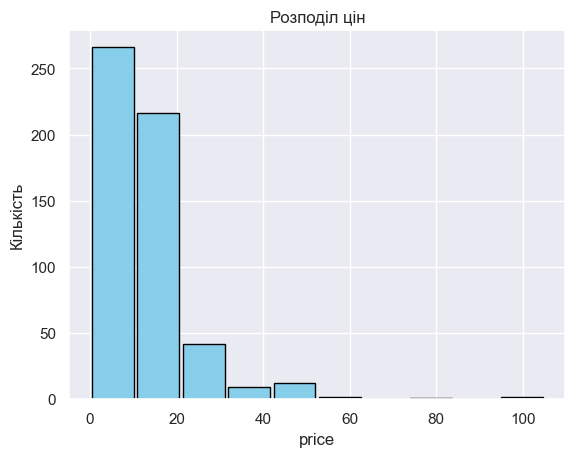

In [10]:
# Побудова гістограми для стовпця "ціна"
sns.set()
df["price"].plot(kind="hist", color="skyblue", edgecolor="black", rwidth=0.92)

# Назви для осі
plt.xlabel("price")
plt.ylabel("Кількість")
plt.title("Розподіл цін")
plt.grid(True)
plt.show()

In [11]:
# Максимальна ціна
max_price = df["price"].max()
print(f"Максимальна ціна: {max_price}", "\n")

Максимальна ціна: 105 



In [12]:
# Мінімальна ціна
min_price = df["price"].min()
print(f"Мінімальна ціна: {min_price}", "\n")

Мінімальна ціна: 0 



In [13]:
# Середня ціна
mean_price = df["price"].mean()
print(f"Середня ціна: {mean_price}", "\n")

Середня ціна: 13.1 



In [14]:
# Медіанна ціна
median_price = df["price"].median()
print(f"Медіанна ціна: {median_price}", "\n")

Медіанна ціна: 11.0 



In [15]:
# Який рейтинг у датасеті найвищий?
max_user_rating = df["user_rating"].max()
print(f"Найвищій рейтінг: {max_user_rating}", "\n")

Найвищій рейтінг: 4.9 



In [16]:
# Підраховуємо, скільки книг мають цей максимальний рейтинг
num_books_max_rating = df[df["user_rating"] == max_user_rating].shape[0]
print(f"Кількість книг з максимальним рейтингом: {num_books_max_rating}", "\n")

Кількість книг з максимальним рейтингом: 52 



In [17]:
# Яка книга має найбільше відгуків?
max_reviews = df["reviews"].max()
book_with_max_reviews = df[df["reviews"] == max_reviews]["name"]
print("Книга(и) з найбільшою кількістю відгуків:", "\n")
print(book_with_max_reviews, "\n")

Книга(и) з найбільшою кількістю відгуків: 

534    Where the Crawdads Sing
Name: name, dtype: object 



In [18]:
# Топ-50 у 2015 році, яка книга найдорожча
top_50 = df[df["year"] == 2015]
top_50_books_2015 = top_50.sort_values(by="user_rating", ascending=False).head(50)
most_expensive_book = top_50_books_2015[
    top_50_books_2015["price"] == top_50_books_2015["price"].max()
]
print("Найдорожча книга у топ-50 у 2015 році:", "\n")
print(most_expensive_book[["name", "price"]], "\n")

Найдорожча книга у топ-50 у 2015 році: 

                                                  name  price
277  Publication Manual of the American Psychologic...     46 



In [19]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
fiction_books_2010 = df[(df["year"] == 2010) & (df["genre"] == "Fiction")].head(50)
num_fiction_books = fiction_books_2010.shape[0]
print(num_fiction_books, "\n")

20 



In [20]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
books_rating_4_9 = df[
    (df["user_rating"] == 4.9) & ((df["year"] == 2010) | (df["year"] == 2011))
]
num_books = books_rating_4_9.shape[0]
print(
    f"Книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках : {num_books}",
    "\n",
)

Книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках : 1 



In [21]:
# №2
books_rating_4_9 = df[(df["user_rating"] == 4.9) & (df["year"].isin([2010, 2011]))]
num_books = books_rating_4_9.shape[0]
print(
    f"Книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках : {num_books}",
    "\n",
)

Книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках : 1 



In [22]:
# відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів.
books_2015_under_8 = df[(df["year"] == 2015) & (df["price"] < 8)].sort_values(
    by="price", ascending=True
)
print(f"Top-50 книг що коштують дешевше 8 долларів: {books_2015_under_8}", "\n")

Top-50 книг що коштують дешевше 8 долларів:                                                   name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                 

In [23]:
# Вибір останньої книги в відсортованому списку
print(books_2015_under_8.iloc[-1], "\n")

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object 



In [24]:
"""Друга частина"""

'Друга частина'

In [25]:
# Групування даних за жанром і обчислення мінімальних та максимальних цін
price_stats = df.groupby("genre")["price"].agg(["min", "max"])

for genre in unique_genres:
    print(f"Максимальна ціна для жанру {genre}: {price_stats.loc[genre, 'max']}")
    print(f"Мінімальна ціна для жанру {genre}: {price_stats.loc[genre, 'min']}", "\n")

Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0 

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0 



In [26]:
# новий датафрейм, який вміщатиме кількість книг для кожного з авторів.
author_books_count = df.groupby("author")["name"].count().reset_index(name="book_count")

print(f"Розмірність таблиці: {author_books_count.shape}")
print(author_books_count.dtypes)

most_books_author = author_books_count["book_count"].idxmax()
author_name = author_books_count.loc[most_books_author, "author"]
print(f"Автор з найбільшою кількістю книг: {author_name}")

num_books = author_books_count.loc[most_books_author, "book_count"]
print(f"Кількість книг цього автора: {num_books}")

Розмірність таблиці: (248, 2)
author        object
book_count     int64
dtype: object
Автор з найбільшою кількістю книг: Jeff Kinney
Кількість книг цього автора: 12


In [27]:
author_avg_rating = (
    df.groupby("author")["user_rating"].mean().reset_index(name="avg_rating")
)

min_rating_author = author_avg_rating["avg_rating"].idxmin()
author_name = author_avg_rating.loc[min_rating_author, "author"]
min_avg_rating = author_avg_rating.loc[min_rating_author, "avg_rating"]

print(f"Автор з мінімальним середнім рейтингом: {author_name}")
print(f"Середній рейтинг цього автора: {min_avg_rating}")

Автор з мінімальним середнім рейтингом: Donna Tartt
Середній рейтинг цього автора: 3.9


In [28]:
# Об'єднання DataFrame
combined_df = pd.concat(
    [author_books_count.set_index("author"), author_avg_rating.set_index("author")],
    axis=1,
)

In [29]:
# Відсортування об'єднаного DataFrame
sorted_df = combined_df.sort_values(
    by=["book_count", "avg_rating"], ascending=[True, True]
)
first_author = sorted_df.index[0]

print(f"Перший автор у списку: {first_author}")

Перший автор у списку: Muriel Barbery


In [30]:
# print(np.sort(df["year"].unique()))

In [31]:
"""Графіки"""

'Графіки'

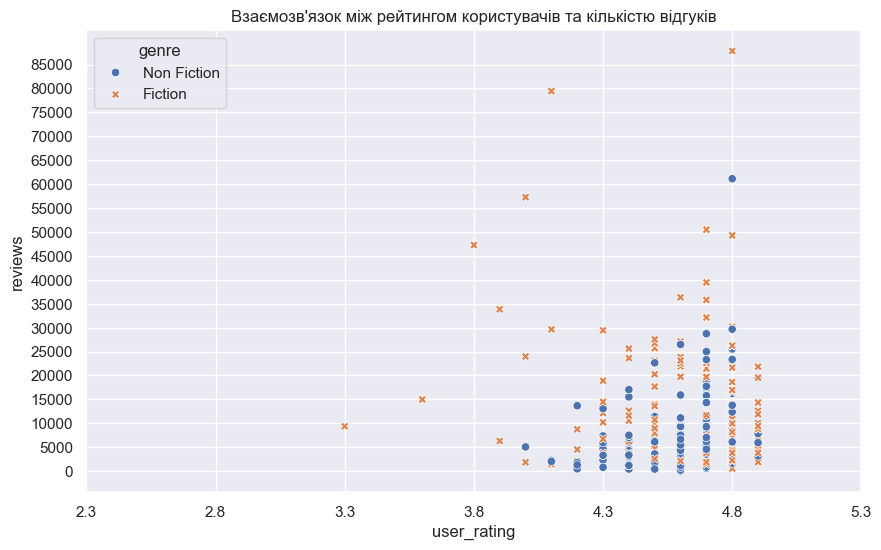

In [37]:
# 1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="user_rating", y="reviews", hue="genre", style="genre")
plt.xticks(np.arange(df["user_rating"].min() - 1, 5.5, 0.5))
plt.yticks(np.arange(0, df["reviews"].max() + 1, 5000))
plt.title("Взаємозв'язок між рейтингом користувачів та кількістю відгуків")
plt.show()

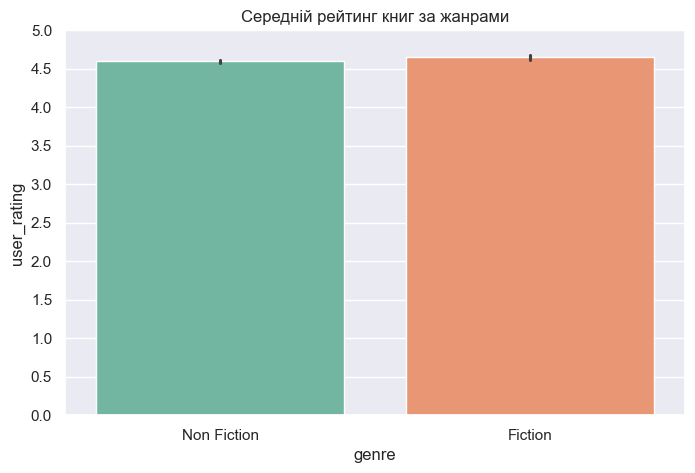

In [40]:
# 2
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="genre", y="user_rating", hue="genre", palette="Set2", legend=False)
plt.yticks(np.arange(0, 5.1, 0.5))
plt.title("Середній рейтинг книг за жанрами")
plt.show()

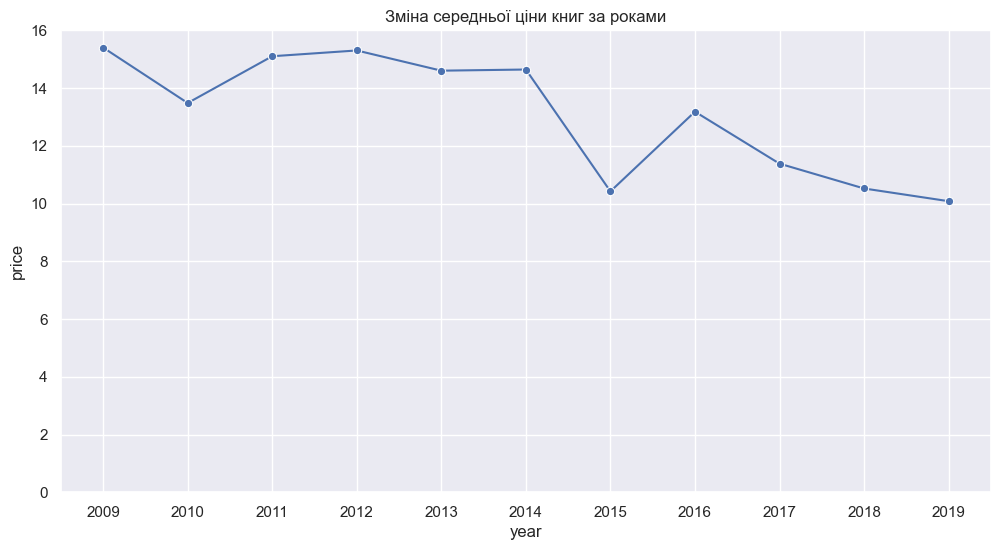

In [41]:
# 3
avg_price_year = df.groupby("year")["price"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_year, x="year", y="price", marker="o")
plt.xticks(avg_price_year["year"])  # Встановлення міток років
plt.yticks(
    np.arange(0, avg_price_year["price"].max() + 1, 2)
)  # Зміна інтервалу міток на осі Y
plt.title("Зміна середньої ціни книг за роками")
plt.show()